In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import os
os.getcwd()

'C:\\Users\\rajur'

In [3]:
import pandas as pd
feedback_df = pd.read_csv("customer_feedback_dataset_f.csv")

feedback_df.head()

,Feedback Text,Sentiment,Date,Category
0,Okay experience overall.,Positive,02-01-2024,Shipping
1,Impressive quality. Highly recommend.,Neutral,07-03-2024,Support
2,Okay experience overall.,Positive,21-02-2024,Shipping
3,Impressive quality. Highly recommend.,Negative,07-03-2024,Shipping
4,Impressive quality. Highly recommend.,Neutral,07-03-2024,Support


In [4]:
!pip install nltk

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
df = pd.read_csv("customer_feedback_dataset_f.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical variables
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['Sentiment', 'Category']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Sentiment', 'Category']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Sentiment', 'Category'], axis=1, inplace=True)

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

df['Processed_Text'] = df['Feedback Text'].apply(preprocess_text)

# Splitting the data
X = df.drop(['Feedback Text'], axis=1)
y = df['Feedback Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization or scaling (if needed) can be done using appropriate techniques

# Now, the preprocessed data is ready for further analysis or machine learning modeling


C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-02-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-02-2024' in DD/MM/YYYY format. Provide format or specif

In [7]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

Duplicate rows:
                             Feedback Text       Date  Sentiment_Negative  \
4    Impressive quality. Highly recommend. 2024-07-03                 0.0   
7    Great customer service! Very helpful. 2024-08-02                 0.0   
10                Okay experience overall. 2024-06-02                 0.0   
11             Late delivery. Frustrating. 2024-11-03                 1.0   
13                Okay experience overall. 2024-02-01                 0.0   
..                                     ...        ...                 ...   
995  Impressive quality. Highly recommend. 2024-07-03                 1.0   
996               Okay experience overall. 2024-02-01                 0.0   
997  Great customer service! Very helpful. 2024-08-02                 0.0   
998  Impressive quality. Highly recommend. 2024-07-03                 0.0   
999  Great customer service! Very helpful. 2024-03-26                 0.0   

     Sentiment_Neutral  Sentiment_Positive  Category_Genera

In [8]:
# Check for null values
null_values = df.isnull().sum()

if null_values.sum() == 0:
    print("No null values found.")
else:
    print("Null values:")
    print(null_values)


No null values found.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("customer_feedback_dataset_f.csv")

#  Summary Statistics
summary_stats = df.describe()
print(summary_stats)


                   Feedback Text Sentiment        Date  Category
count                       1000      1000        1000      1000
unique                         5         3          10         3
top     Okay experience overall.  Negative  02-01-2024  Shipping
freq                         327       401         185       497


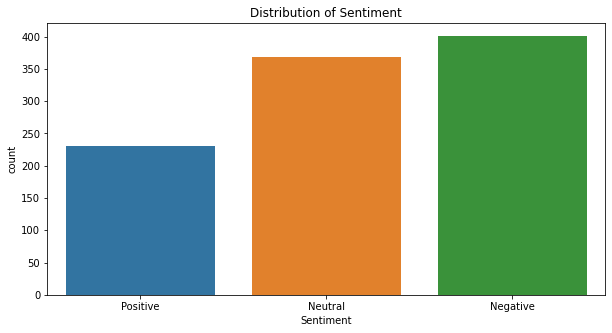

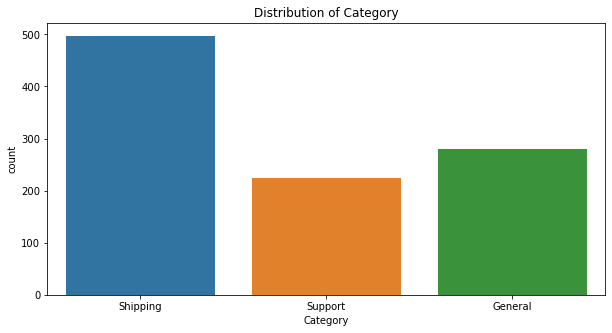

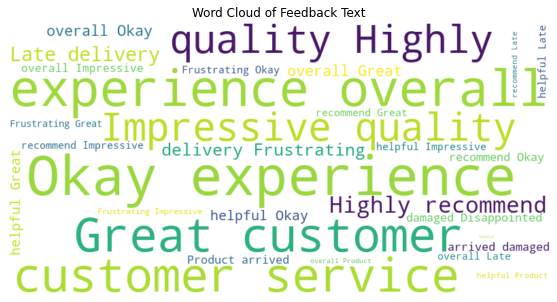

C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-02-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rajur\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-02-2024' in DD/MM/YYYY format. Provide format or specif

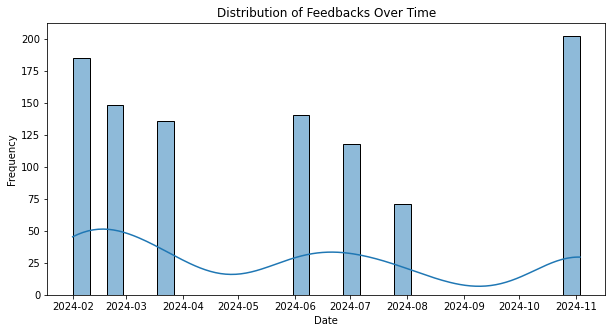

In [10]:
#  Distribution of Categorical Variables
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Category')
plt.show()

#  Text Analysis
from wordcloud import WordCloud

text = ' '.join(df['Feedback Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback Text')
plt.show()

#  Temporal Analysis
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 5))
sns.histplot(df['Date'], bins=30, kde=True)
plt.title('Distribution of Feedbacks Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("customer_feedback_dataset_f.csv")

# Check if there are any numeric columns in the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_columns) == 0:
    print("No numeric columns found in the dataset.")
else:
    # Drop non-numeric columns and handle missing values
    numeric_df = df[numeric_columns]
    numeric_df.dropna(inplace=True)  # Drop rows with missing values
    
    if numeric_df.empty:
        print("No numeric values remaining in the dataset after handling missing values.")
    else:
        # Calculate the correlation matrix
        correlation_matrix = numeric_df.corr()

        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Heatmap')
        plt.show()

No numeric columns found in the dataset.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
feedback_df = pd.read_csv("customer_feedback_dataset_f.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feedback_df["Feedback Text"], feedback_df["Sentiment"], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Multinomial Naive Bayes": MultinomialNB()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {name}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print()


C:\Users\rajur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
  Accuracy: 0.50
  Precision: 0.29
  Recall: 0.50
  F1-score: 0.37

Model: Support Vector Machine
  Accuracy: 0.50
  Precision: 0.29
  Recall: 0.50
  F1-score: 0.37

Model: Random Forest
  Accuracy: 0.50
  Precision: 0.29
  Recall: 0.50
  F1-score: 0.37

Model: Multinomial Naive Bayes
  Accuracy: 0.48
  Precision: 0.51
  Recall: 0.48
  F1-score: 0.46



C:\Users\rajur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


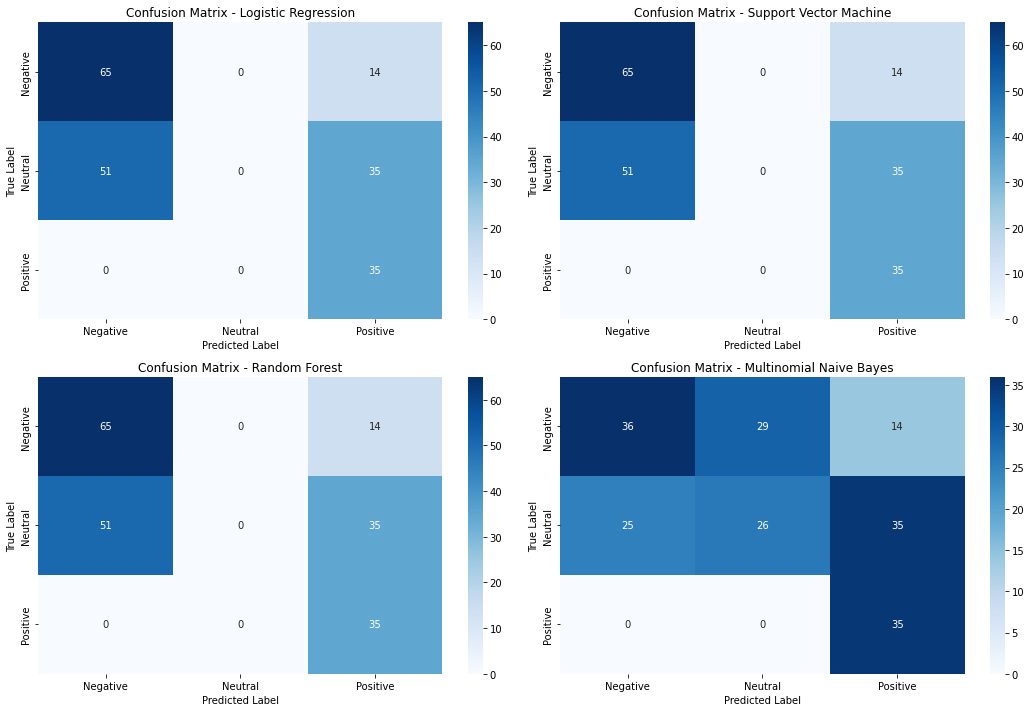

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
feedback_df = pd.read_csv("customer_feedback_dataset_f.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feedback_df["Feedback Text"], feedback_df["Sentiment"], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Initialize confusion matrix dictionary
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test_tfidf)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Read the dataset
df = pd.read_csv("customer_feedback_dataset_f.csv", encoding="latin-1")

# Step 2: Preprocess the data (fill missing values with an empty string)
feedback_df['Feedback Text'].fillna("", inplace=True)

# Step 3: Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(feedback_df['Feedback Text'])
y = df['Sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on new data
def predict_sentiment(tweet):
    tweet_vectorized = vectorizer.transform([tweet])
    prediction = rf_classifier.predict(tweet_vectorized)
    return prediction[0]

# Example usage
tweet = input("Enter your tweet: ")
sentiment = predict_sentiment(tweet)
print("Predicted sentiment:", sentiment)


Enter your tweet: Overall good experience
Predicted sentiment: Neutral
